In [22]:
#exp3 (gamma/theta power before and after LTP, no Ketamine)
import numpy as np
from matplotlib import pyplot as plt
import seedavg
from scipy import signal
x=np.arange(2)

data,whist=np.load("recfolder/firstsamplewithltp.npy",allow_pickle=True)


In [23]:
def bandpower(f,p,start, end):# integrates a spectral power (input freqs and powers) from start to end in frequenzy space
        bpow=0
        for i in range(len(p)):
            if start<f[i] and f[i]<end: bpow+=p[i]*(f[1]-f[0])
        return bpow 


<IPython.core.display.Javascript object>


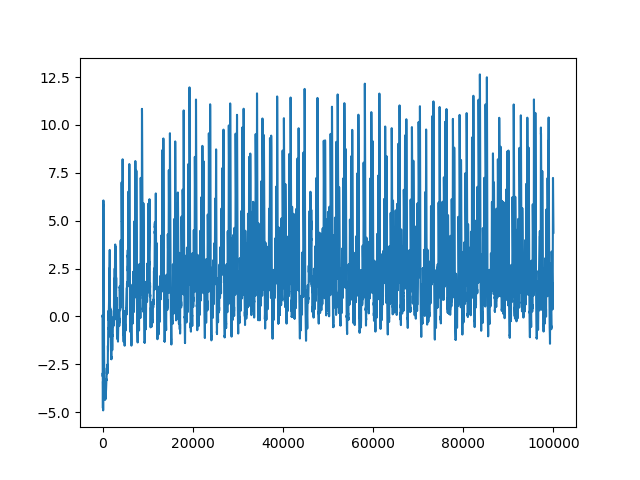

In [24]:
%matplotlib notebook
plt.plot(data)
plt.show()

<IPython.core.display.Javascript object>


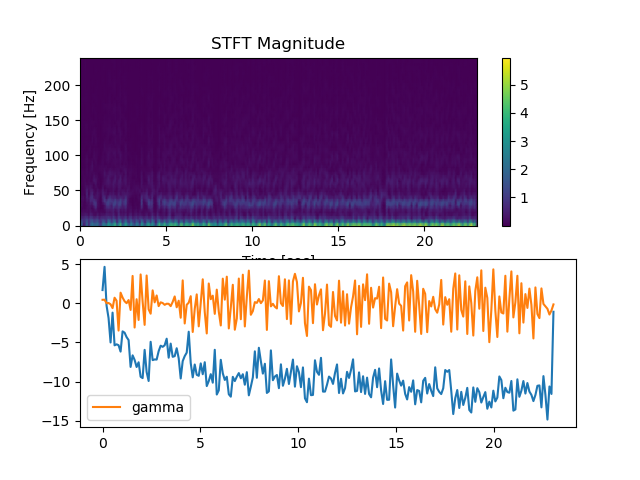

fin


In [7]:
%matplotlib notebook
f, t, Zxx = signal.stft(data, fs=1e4, window='hann', nperseg=2048, noverlap=1024)
f=f[:25]
Zxx=Zxx[:25]
plt.subplot(2,1,1)
plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
plt.colorbar()
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.subplot(2,1,2)
bandt=[]
bandg=[]
for i in range(len(t)):
    thet=bandpower(f,Zxx[:,i],3,12)
    gamm=bandpower(f,Zxx[:,i],30,100)
    bandt.append(thet)
    bandg.append(gamm)
plt.plot(t,bandt)
plt.plot(t,bandg,label="gamma")
plt.legend()
print("fin")
plt.show()

In [28]:
import 

TypeError: 'list' object is not callable

<IPython.core.display.Javascript object>


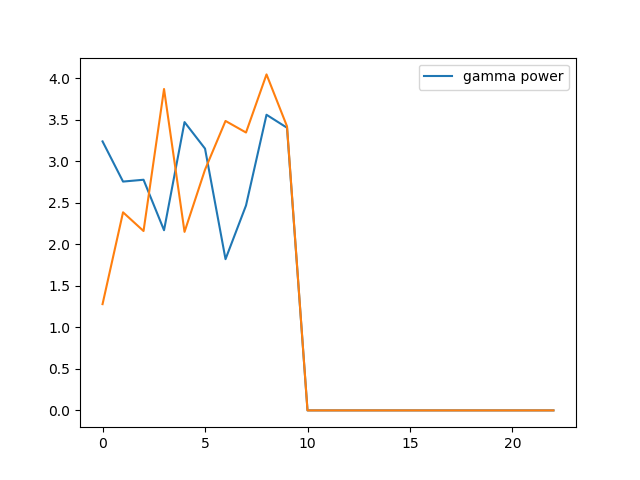

In [26]:
%matplotlib notebook
secondd=10000
gar=[]
tar=[]
for i in range(23):
    datai=data[secondd*i:secondd*(i+1)]
    f,p=signal.welch(datai,1e4,nperseg=len(datai))
    gar.append(bandpower(f,p,3,12))
    tar.append(bandpower(f,p,30,100))

plt.plot(gar,label="gamma power")
plt.plot(tar)
plt.legend()
plt.show()